__Agenda__

1. Introduction to unsupervised learning

2. Clustering

3. Kmeans algorithm details

4. Implementation of kmeans with sklearn

5. How to choose number of clusters: Silhouette & Calinski-Harabasz score

6. Challenge

7. An interesting application of the kmeans algorithm with image processing.

8. Summary

# Unsupervised Learning

- Association Rules

- Cluster Analysis

- Principal Components, Curves and Surfaces

- Indepedent Component Analysis

- Multidimensional Scaling

- Non-linear Dimension Reduction

<img src="img/map_of_ml.png" width=650, height=650> 

[Img source](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

__Supervised vs. Unsupervised Machine Learning__

- Supervised Learning: Use features and labels to learn. Predict new cases without labels

- Unsupervised Learning: There are only features - __No Labels__: Detect patterns, anomalies etc.

## Clustering

A clustering problem is where you want to discover the inherent groupings in the data.

[Discuss p4 of this slides](https://www.cs.cmu.edu/afs/andrew/course/15/381-f08/www/lectures/clustering.pdf)


## K-Means  Algorithm


<img src="img/kmeans.png" width=650, height=650> 


[Discuss p16-21](http://www.mit.edu/~9.54/fall14/slides/Class13.pdf)

[Let's see kmeans in action](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)


[This notebook is motivated from](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)

In [1]:
## make_blobs and make_moons give us simulated data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

## From sklearn.cluster we will call KMeans
from sklearn.cluster import KMeans

## Some other necessary libraries
import matplotlib.pyplot as plt
import numpy as np

## to retrive some data 
import pickle 


## To be able to reproduce the results let's set the random_seed

%matplotlib inline  

In [2]:
np.random.seed(110119)

X, y = make_blobs(n_samples = 700, n_features = 2, centers = 4, cluster_std= .5)

Text(0.5, 1.0, 'A synthetic dataset with 2-features')

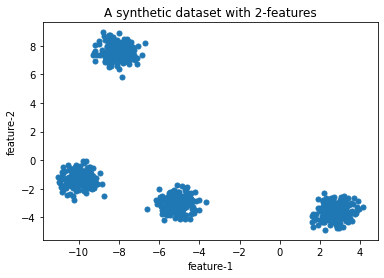

In [3]:
## can you plot this dataset

plt.scatter(X[:, 0], X[:, 1], s = 25);

plt.xlabel('feature-1')
plt.ylabel('feature-2')
plt.title('A synthetic dataset with 2-features')

## Using KMEANS with sklearn

Text(0, 0.5, 'Feature-2')

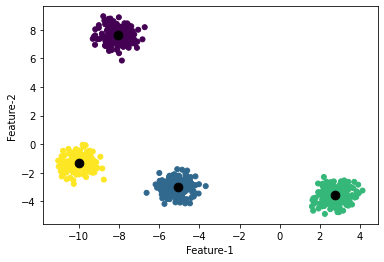

In [4]:

## let's instantiate kmeans algorithm
## don't forget to check its parameters

k_means = KMeans(n_clusters= 4)

# dont forget to fit the model!

k_means.fit(X)

## we make a prediction for each point

clusters = k_means.predict(X)

## we can access the coordinates of the cluster centers by cluster_centers_ method
cl_centers = k_means.cluster_centers_

## note that the colors are different - Is this a problem?
plt.scatter(X[:, 0], X[:, 1], c = clusters, s = 25)

## also let's mark the cluster centers too.
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c = 'black', s = 75)

plt.xlabel('Feature-1')
plt.ylabel('Feature-2')

In [5]:
X.shape

(700, 2)

In [6]:
cl_centers

array([[-8.05013613,  7.64023321],
       [-5.08678958, -2.99039732],
       [ 2.74844296, -3.56980921],
       [-9.98013408, -1.35086592]])

__Your Turn__

- Guess how many cluster are there in the figure below.

- Use kmeans to find clusters.

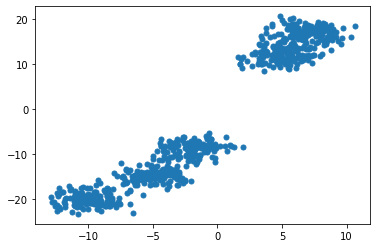

In [7]:
dbfile = open('blobs_1.obj', 'rb')      
data = pickle.load(dbfile) 

X = data[0]

## can you plot this dataset

plt.scatter(X[:, 0], X[:, 1], s = 25);


__Compare your results with the actual values below.__

- Do they close to the actual values?

- What might go wrong?



In [8]:
# %load -r 1-10 support.py
## let's play with cluster_std and try to find number of clusters

np.random.seed(110119)

X, y = make_blobs(n_samples = 700, n_features = 2, centers = np.array([[-10, -20],
                                                                       [-5, -15],
                                                                       [-2, -9],
                                                                       [5, 12],
                                                                       [7, 17]
                                                                      ]), cluster_std= 1.4 )

[[ -1.94387033  -8.68917621]
 [  5.96326118  14.54295369]
 [ -9.9036375  -20.00733701]
 [ -4.96003313 -14.68285104]]


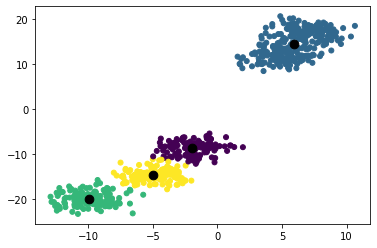

In [12]:
# %load -r 11-34 support.py

import pickle
object_blobs_1 = [X,y]
file_blobs_1 = open('blobs_1.obj', 'wb')
pickle.dump(object_blobs_1, file_blobs_1)


## let's instantiate kmeans algorithm
## don't forget to check its parameters
k_means = KMeans(n_clusters= 4)

# dont forget to fit the model!
k_means.fit(X)

## we make a prediction for each point
y_hat = k_means.predict(X)

## we can access the coordinates of the cluster centers by cluster_centers_ method
cl_centers = k_means.cluster_centers_

print(cl_centers)
## note that the colors are different - Is this a problem?
plt.scatter(X[:,0], X[:,1], c = y_hat, s = 25)

cl_centers = k_means.cluster_centers_

plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c = 'black', s = 75)



In [10]:
k_means.inertia_

18536.794876350643

Q: How do we find optimal K value?

[Metrics](https://scikit-learn.org/stable/modules/clustering.html#k-mean)

[Calinski_Harabasz](https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index)

[Silhoutte Coefficients](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)

In [41]:
import sys

!conda install --yes --prefix {sys.prefix} -c districtdatalabs yellowbrick

Solving environment: done

# All requested packages already installed.



/Users/mguner/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


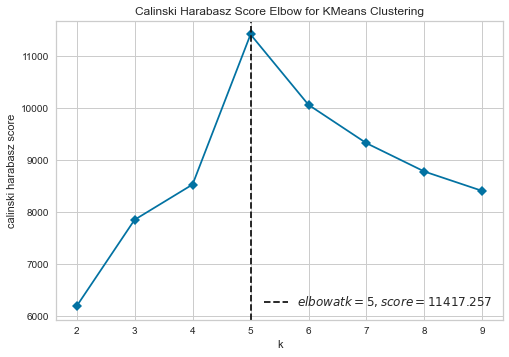

In [42]:
##  install yellowbrck library -- pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,10), metric = 'calinski_harabasz', timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


/Users/mguner/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/mguner/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/mguner/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


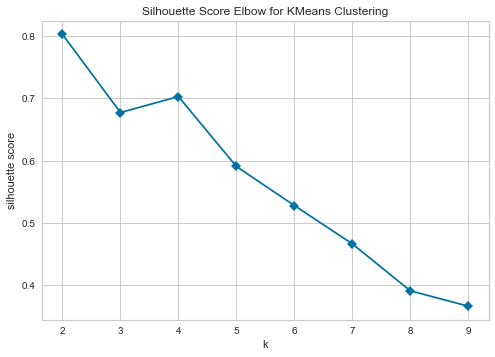

In [43]:
# Instantiate the clustering model and visualizer

model = KMeans()
# with silhouette method

visualizer = KElbowVisualizer(model, k=(2,10), metric = 'silhouette', timings=False)

visualizer.fit(X)   
visualizer.show()


[Yellowbrick API](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

## Exercise:
### K-means on larger dataset - Wine subscription

You want to run a wine subscription service, but you have no idea about wine tasting notes. You are a person of science.
You have a wine dataset of scientific measurements.
If you know a customer likes a certain wine in the dataset, can you recommend other wines to the customer in the same cluster?

<img src="https://images.pexels.com/photos/1097425/pexels-photo-1097425.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" width=250, height=250> 


#### Questions:
- How many clusters are in the wine dataset?
- What are the characteristics of each clusters?
- What problems do you see potentially in the data?

the dataset is `Wine.csv`

Instructions:
- First, remove customer_segment from the dataset

In [15]:
import pandas as pd
# Work on problem here:
wine = pd.read_csv('data/Wine.csv')
# wine.drop(columns=['Customer_Segment'], inplace=True)
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


(178, 13)

### An interesting application of clustering: Color compression

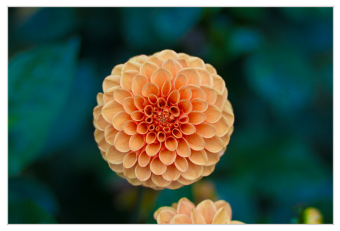

In [45]:
## More interesting case with kmeans clustering

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import numpy as np


flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [46]:
flower.shape
data = flower / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

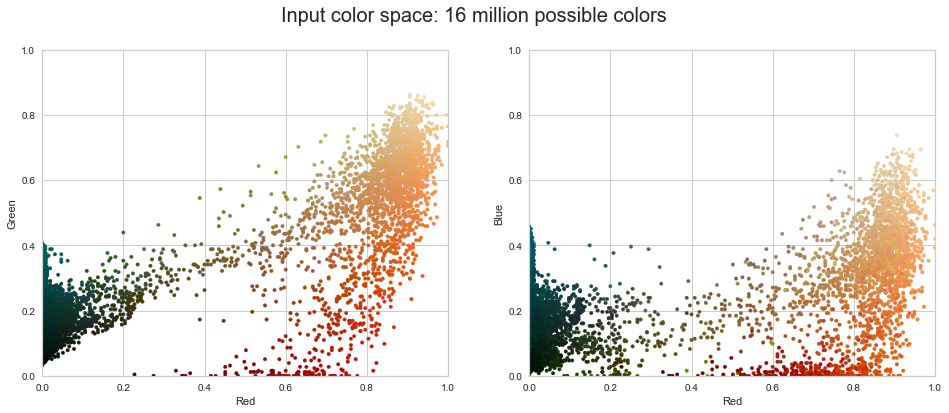

In [47]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);
    
plot_pixels(data, title='Input color space: 16 million possible colors')


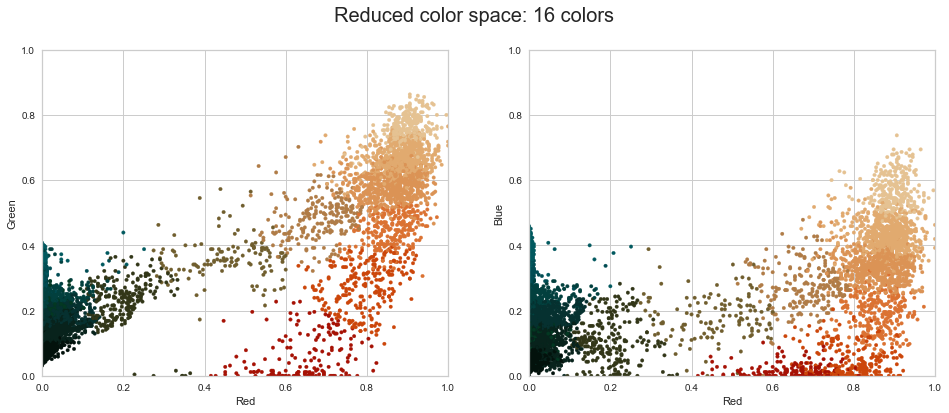

In [53]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

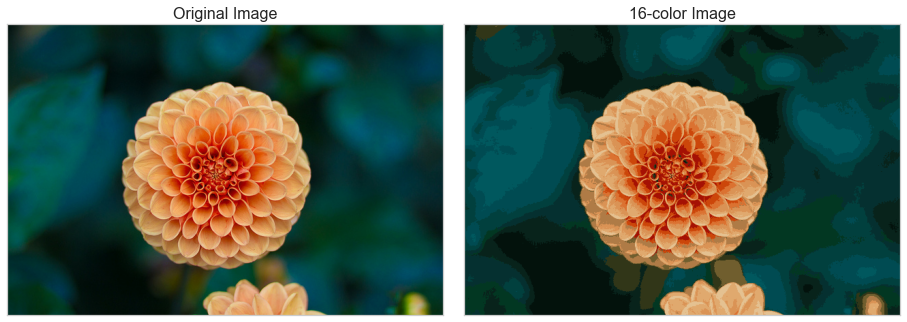

In [54]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

## More on Clustering Algorithms

- [Other popular clustering algorithms ](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)